### DOMAIN: Telecom
#### CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
##### •  DATA DESCRIPTION: Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The
data set includes information about:
##### • Customers who left within the last month – the column is called Churn
##### • Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
##### • Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
##### • Demographic info about customers – gender, age range, and if they have partners and dependents

###    • PROJECT OBJECTIVE: To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

### 1. Data Understanding & Exploration: [5 Marks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 1.A Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable. [1 Mark]
tcc1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
tcc1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [3]:
# 1.B Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable. [1 Mark]
tcc2 = pd.read_csv("TelcomCustomer-Churn_2.csv")
tcc2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame [2 Mark]
# Ensuring that all matching and unique rows are taken care in each data set 
tcc=pd.merge(tcc1,tcc2, left_index=True, right_index=True)
tcc.head()

,customerID_x,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# 1.D Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python. [1 Marks]
tcc1.shape

(7043, 10)

In [6]:
tcc2.shape

(7043, 12)

In [7]:
tcc.shape

(7043, 22)

In [8]:
# No loss of rows or extra 7043 rows in final data from 
# which mean 1:1 mapping between two files
# Columns also merged properly 10 + 12 = 22. 
# checking columns 
tcc1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [9]:
tcc2.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
tcc.columns

Index(['customerID_x', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'customerID_y', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [11]:
# Both files had distinct columns. Total columns in final datafram become 10+12 = 22 

In [12]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID_x      7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  customerID_y      7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### 2. Data Cleaning & Analysis: [5 Marks]

In [13]:
# 2.A. Impute missing/unexpected values in the DataFrame. [2 Marks]
# Recplce '' to NaN to see if there are null columns in the dataset

In [14]:
tcc.isna().sum()

customerID_x        0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
customerID_y        0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Checking of there are any blank columns 
tcc.replace(" ", np.nan).isna().sum()

customerID_x         0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
customerID_y         0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Checking for any blank column identified in Total charges
tcc[tcc["TotalCharges"] == " "]

,customerID_x,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [17]:
# All these are cusomters that have newly srarted with tenure 0 
#Hence replacing total charges for them to 0. 
#This is based on the deduction that in the cases where tenure in 1 months Total charges is equal to monthy charge
tcc=tcc.replace(" ", 0)

In [18]:
tcc[tcc["TotalCharges"] == " "]

,customerID_x,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [19]:
# No null/blank values remaining

In [20]:
# 2.B Make sure all the variables with continuous values are of ‘Float’ type. [2 Marks]
#[For Example: MonthlyCharges, TotalCharges]
tcc = tcc.astype({
    'TotalCharges': 'float64'
    })

In [21]:
#2.C Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage
# distribution in the pie-chart. [4 Marks]

def plot_pieChart_for_categorialData( data, category ):
    sizes = data[category].value_counts(sort = True)
    labels = np.unique(data[category])
    plt.pie(sizes, labels = labels, autopct='%1.1f%%')

In [22]:
# Building Pie charts for each category
# 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
# 'PhoneService', 'MultipleLines', 'InternetService',
# 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
# 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
# 'PaperlessBilling', 'PaymentMethod', 'Churn'

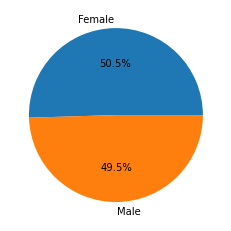

In [23]:
# gender
plot_pieChart_for_categorialData(tcc, 'gender')

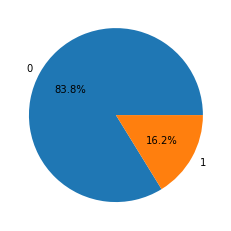

In [24]:
#SeniorCitizen
plot_pieChart_for_categorialData(tcc, 'SeniorCitizen')

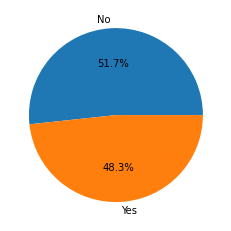

In [25]:
#Partner
plot_pieChart_for_categorialData(tcc, 'Partner')

In [26]:
# Almost half of the customers live with partner 

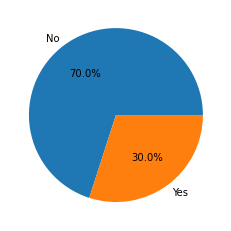

In [27]:
# Dependents
plot_pieChart_for_categorialData(tcc, 'Dependents')

In [28]:
# Only 30% of the customers have dependents

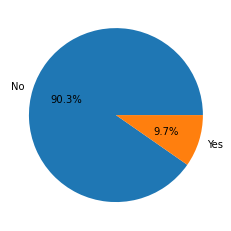

In [29]:
# PhoneService
plot_pieChart_for_categorialData(tcc, 'PhoneService')

In [30]:
# Only 10% of the customers use the connection for phone

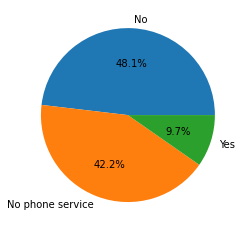

In [31]:
#MultipleLines
plot_pieChart_for_categorialData(tcc, 'MultipleLines')

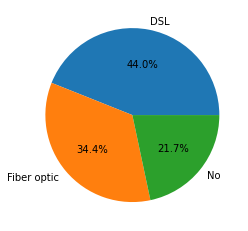

In [32]:
#InternetService
plot_pieChart_for_categorialData(tcc, 'InternetService')

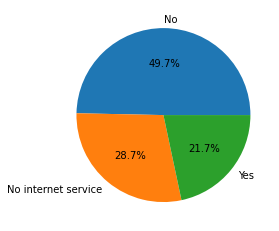

In [33]:
#OnlineSecurity
plot_pieChart_for_categorialData(tcc, 'OnlineSecurity')

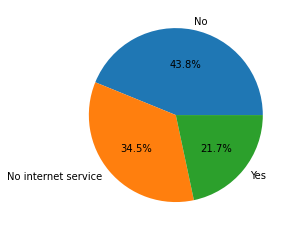

In [34]:
#OnlineBackup
plot_pieChart_for_categorialData(tcc, 'OnlineBackup')

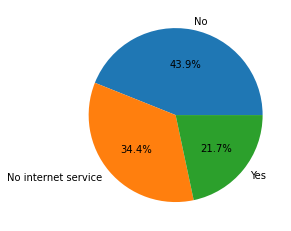

In [35]:
#DeviceProtection
plot_pieChart_for_categorialData(tcc, 'DeviceProtection')

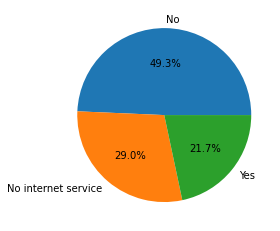

In [36]:
#TechSupport
plot_pieChart_for_categorialData(tcc, 'TechSupport')

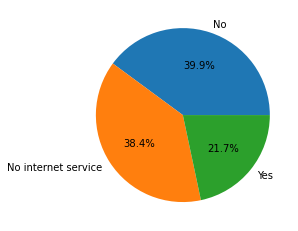

In [37]:
#StreamingTV
plot_pieChart_for_categorialData(tcc, 'StreamingTV')

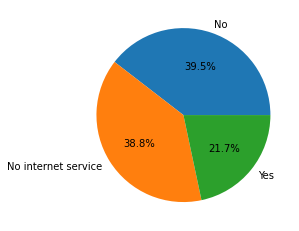

In [38]:
#StreamingMovies
plot_pieChart_for_categorialData(tcc, 'StreamingMovies')

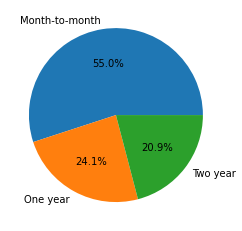

In [39]:
#Contract
plot_pieChart_for_categorialData(tcc, 'Contract')

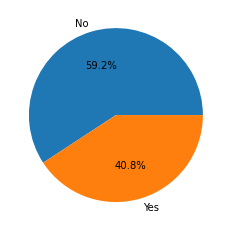

In [40]:
#PaperlessBilling
plot_pieChart_for_categorialData(tcc, 'PaperlessBilling')

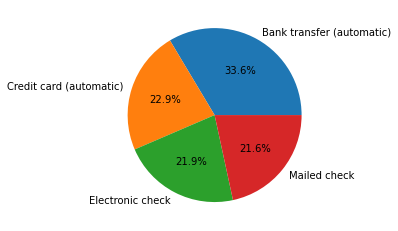

In [41]:
#PaymentMethod
plot_pieChart_for_categorialData(tcc, 'PaymentMethod')

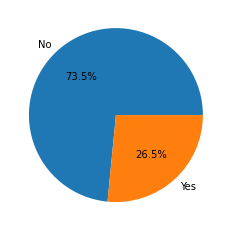

In [42]:
#Churn - Variable that we will use for prediction later
plot_pieChart_for_categorialData(tcc, 'Churn')

### 2.D. Share insights for Q2.c. [2 Marks]

2.D. Share insights for Q2.c. [2 Marks]
1. Curn is appx. 25% i.e. 25 % of our customers leave our services which looks very high.
2. Bank transfer is most popular method od payment, other methods stand equal at almost ~22%
3. Only 40% of cusotmers have moved to paperless billing
4. 55% of the customers pay on a monthly basis. Need to watch this category i.e. why they are not commiting to longer periods. Will cause churn.
5. Only 21% cusomters stream movies via the internet service.
6. Almost similar percentage stream TV via the internet service.
7. ~21% cusotmers took Tech support help for internet services
8. ~21% of the customers use Device Protection, online security and online back-up services
9. ~21% people are not using internet services from us. 44% are old DSL service
10. 10% of the customers have multiple lines from us.
11. Gender ratio of our customer is equal in percentages
12. 16% of our customers are senior citizens
13. Only 10% of customers use phone services. Mostly they use us for internet services
14. ~half of our customers live with partners
15. Almost 30% of our customers have dependents / kids.

### 2.E. Encode all the appropriate Categorical features with the best suitable approach. [2 Marks]

In [43]:
# Label Encoding
# 'gender','Partner', 'Dependents',
# 'PhoneService', 'MultipleLines', 'InternetService',
# 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
# 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
# 'PaperlessBilling', 'PaymentMethod', 'Churn'
# Did label encoding on above parmeter, though some of the variables had 3 values but that was highly corelated 
# with if the customer had internet or not. Hence conveted it to label encoding

replaceStruct = {
                "gender":         {"Male": 1, "Female": 0 },
                "Partner":        {"No": 0, "Yes": 1 },
                "Dependents":     {"No": 0, "Yes": 1 },
                "PhoneService":   {"No": 0, "Yes": 1 },
                "MultipleLines":  {"No phone service":0, "No":0, "Yes":1    },
                "OnlineSecurity": {"No internet service":0,"No":0, "Yes":1  },
                "OnlineBackup":   {"No internet service":0,"No":0, "Yes":1  },
                "DeviceProtection":{"No internet service":0,"No":0, "Yes":1 },
                "TechSupport"     :{"No internet service":0,"No":0, "Yes":1 },
                "StreamingTV"     :{"No internet service":0,"No":0, "Yes":1 },
                "StreamingMovies" :{"No internet service":0,"No":0, "Yes":1 },
                "PaperlessBilling":{"No": 0, "Yes": 1 },
                "Churn"           :{"No": 0, "Yes": 1 }
                }

In [44]:
tcc=tcc.replace(replaceStruct)

In [45]:
# Performed one hot envoding on rest of the columns.
oneHotCols=["PaymentMethod","Contract", "InternetService"]
tcc=pd.get_dummies(tcc, columns=oneHotCols)

In [46]:
tcc.head()

,customerID_x,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,customerID_y,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,0,0,1,0,1,0,0,0,7590-VHVEG,...,0,0,1,0,1,0,0,1,0,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,5575-GNVDE,...,0,0,0,1,0,1,0,1,0,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,3668-QPYBK,...,0,0,0,1,1,0,0,1,0,0
3,7795-CFOCW,1,0,0,0,45,0,0,1,7795-CFOCW,...,1,0,0,0,0,1,0,1,0,0
4,9237-HQITU,0,0,0,0,2,1,0,0,9237-HQITU,...,0,0,1,0,1,0,0,0,1,0


In [47]:
#dropping columns not required for analysis 
tcc.drop(["customerID_x","customerID_y"],axis=1,inplace=True)

### 2.F. Split the data into 80% train and 20% test. [1 Marks]

In [48]:
from sklearn.model_selection import train_test_split
tcc.shape

(7043, 27)

In [49]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

In [50]:
#Segregating Target Variable from Churn( value to be predicted)
y = tcc['Churn'].values
X = tcc.drop(columns = ['Churn'])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, train_size =0.80,stratify=y)

### 2.E Normalize/Standardize the data with the best suitable approach.

In [52]:
# Applying standard scaler for Numerical values  
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()

vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
X_train[vars] = scaler.fit_transform(X_train[vars])
X_test[vars] = scaler.fit_transform(X_test[vars])

### 3. Model building and Improvement: 

#### 3. A. Train a model using XGBoost. Also print best performing parameters along with train and test performance. [5 Marks]

In [53]:
from xgboost import XGBClassifier 
from sklearn.metrics import accuracy_score, classification_report 
from sklearn.metrics import roc_auc_score, roc_curve


XGBoost_Model = XGBClassifier( max_depth = 5, n_estimators=200, objective='binary:logistic')
XGBoost_Model.fit(X_train, y_train)
XGBoost_Result = XGBoost_Model.fit(X_train, y_train)
XGBoost_Prediction = XGBoost_Model.predict(X_test)
XGBoost_Probabilities = XGBoost_Model.predict_proba(X_test)

print("===================================================================")
print("XGBoost - Baselined ")
print("===================================================================")
print("\n Classification Report: \n", classification_report(y_test,XGBoost_Prediction))
print("Accuracy Score: ",accuracy_score(y_test,XGBoost_Prediction))


#Features that are important to us 
feature_importance=XGBoost_Model.feature_importances_
Coef = pd.Series(feature_importance,
                 index=X.columns.values)

print("Feature Importance : \n",Coef.sort_values(ascending = False))

XGBoost - Baselined 

 Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409

Accuracy Score:  0.7856635911994322
Feature Importance : 
 InternetService_Fiber optic                0.387830
Contract_Month-to-month                    0.275763
InternetService_No                         0.038264
Contract_Two year                          0.035622
InternetService_DSL                        0.024594
PhoneService                               0.023077
PaymentMethod_Electronic check             0.017651
Contract_One year                          0.015482
tenure                                     0.015383
StreamingTV                                0.014907
SeniorCitizen                              0.0

## Features that cause maximum churn are 
#### 1. Contract_Month-to-month
#### 2. InternetService_Fiber optic
#### i.e. cusotmers who are on monthly payment and have not yet switched to fibreoptics services will have maximum churn

### 3. B. Improve performance of the XGBoost as much as possible. 
### Also print best performing parameters along with train and test performance

In [54]:
from sklearn.model_selection import GridSearchCV
xgBoost_grid_cv = {"max_depth": [2,4,6,8],
                "min_child_weight":[1,3,5],
                "n_estimators": [100,200,300]
                }

# Setup grid hyperparameter search for LogisticRegression
xgBoost = GridSearchCV(XGBClassifier(),
                          param_grid=xgBoost_grid_cv,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
xgBoost.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [55]:
xgBoost.best_params_

{'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}

In [56]:
xgBoost.score(X_test, y_test)

0.7998580553584103

In [57]:
XGBoost_Model = XGBClassifier( max_depth = 2, min_child_weight=1, n_estimators=100)
XGBoost_Model.fit(X_train, y_train)
XGBoost_Result = XGBoost_Model.fit(X_train, y_train)
XGBoost_Result = XGBoost_Model.fit(X_train, y_train)
XGBoost_Prediction = XGBoost_Model.predict(X_test)
print("===================================================================")
print("XGBoost - Tuned ")
print("===================================================================")
print("\n Classification Report - Tuned: \n", classification_report(y_test,XGBoost_Prediction))

XGBoost - Tuned 

 Classification Report - Tuned: 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409



## Though the accuracy is between 76 to 81%, we also ensure that the recall and precision for churn classification is best when  number of estimatiors are 100 max depth is 2 and min_child_weight = 1. There parmeters ensure good recall and precision scores for churn = 1 / "Yes" 
## Two key feature to consider are 
## 1. Contract_Month-to-month 
## 2. InternetService_Fiber optic 
### People who pay monthly and have not yet switched to fibreoptics there is a higer churn.

# Recommendation: Suggestion give big discounts on contracts making it attractive for customer Try giving free upgrades to fibleoptics connections, may be a competitor is doing that and we are loosing the customers to competitors. 

# PART B :
## DOMAIN: IT
### • CONTEXT: The purpose is to build a machine learning pipeline that will work autonomously irrespective of Data and users can save efforts involved in building pipelines for each dataset.
### • PROJECT OBJECTIVE: Build a machine learning pipeline that will run autonomously with the csv file and return best performing model.
##### • STEPS AND TASK [30 Marks]:
#### 1. Build a simple ML pipeline which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
#### 2. Create separate functions for various purposes.
#### 3. Various base models should be trained to select the best performing model.
#### 4. Pickle file should be saved for the best performing model. Include best coding practices in the code:
##### • Modularization
##### • Maintainability
##### • Well commented code etc.

In [58]:
# Importing libraries required for the run
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report 

## PART B. 1: Build a simple ML pipeline which will accept a single ‘.csv’ file as  input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 

In [59]:
# Reading the data for pipeline project
tcc1_pl = pd.read_csv("TelcomCustomer-Churn_1.csv")
tcc2_pl = pd.read_csv("TelcomCustomer-Churn_2.csv")
# merging the data 
tcc_pl =pd.merge(tcc1_pl,tcc2_pl, left_index=True, right_index=True)

In [60]:
# Create input features in X and y is target column to be predicted 
y = tcc_pl['Churn']
X = tcc_pl.drop(columns = ['Churn'])

In [61]:
# Sampling dat for trianing and testing 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, train_size =0.80,stratify=y)

In [62]:
# Understanding list of columns. Since previouly we have done detailed analysis of the columns we understand
# which columns need to be dropped 
# which are categorial columns 
# which are numerical columns 
tcc_pl.columns

Index(['customerID_x', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'customerID_y', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## PART B. 2 : Create separate functions for various purposes.

In [63]:
# List og features not required for analysis 
drop_feature = ['customerID_x','customerID_y']

In [64]:
# Numeric Features in the data set 
num_feature = ['tenure','MonthlyCharges','TotalCharges',]

In [65]:
# Categorial Features in the data set
cat_feature = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod']

In [66]:
# Part B.2 : Function for removing spaces
# From above analysis in case study 1 we know we need to remove spaces from TotalCharges columns 
# Defining a function that replaces blanks with not a number 

def remove_spaces(input_df):
    input_df["TotalCharges"] = input_df["TotalCharges"].replace(" ", np.nan)
    return input_df


class SpaceRemoveTrf():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [67]:
# Part B.2 : Function for simplifying categorial data 
# There are certain text elements in the data that have same meaning as not having connection.
# Replacig them with "No" to reduce noise of classification during one hot encoding 
# Categorial Variable Simplification function 

def categorial_col_simplify(input_df):
    input_df["StreamingMovies"]  = input_df["StreamingMovies"].replace("No internet service", "No")
    input_df["MultipleLines"]    = input_df["MultipleLines"].replace("No phone service", "No")
    input_df["OnlineSecurity"]   = input_df["OnlineSecurity"].replace("No internet service", "No")
    input_df["OnlineBackup"]     = input_df["OnlineBackup"].replace("No internet service", "No")
    input_df["DeviceProtection"] = input_df["DeviceProtection"].replace("No internet service", "No")
    input_df["TechSupport"]      = input_df["TechSupport"].replace("No internet service", "No")
    input_df["StreamingTV"]      = input_df["StreamingTV"].replace("No internet service", "No")
    return input_df

    
    
class CategorialColSimplificationTrf():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

In [68]:
# From analysis prevouly we know that places were we have NaN we replace it with Zero as they are 
# new customers that have not yet paid any amount 
# Then we apply standard scaler to all numeric values
numeric_trf = Pipeline(steps=[('meanimputer', SimpleImputer(strategy='constant', fill_value=0)),
                              ('stdscaler', StandardScaler())
                             ])


In [69]:
# Then we do one hot encoding for all categorial values
categorical_trf = Pipeline(steps=[
                                  ('onehotenc', OneHotEncoder(handle_unknown='ignore'))
                                 ])

In [70]:
# Columns tranformformation 
#1. Drop columns not required 
#2. Numeric columns missing to be replaced with 0
#3. Apply standard scaler on numeric columns 
#4. One hot encode categorial columnns.
col_trf = ColumnTransformer(transformers=[('drop_columns', 'drop', drop_feature),
                                          ('numeric_processing',numeric_trf, num_feature),
                                          ('categorical_processing', categorical_trf, cat_feature)
                                         ], remainder='drop')

In [71]:
#Define pipeline 
#1. Remove spaces 
#2. Simplify categorial variables
#3. transform
pipeline = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                    ])

In [72]:
pipeline.fit(X_train)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceRemoveTrf object at 0x7fb3bd7559d0>),
                ('simplifyCatVar',
                 <__main__.CategorialColSimplificationTrf object at 0x7fb3bd755910>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID_x',
                                                   'customerID_y']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer(fill_value...
                                                   'TotalCharges']),
                                                 ('categorical_processing',
                                                  Pipeline(steps=[('onehotenc',
                                                      

## Part B. 3 : Various base models should be trained to select the best performing model

In [73]:
# Running differnt models and trying to find the model that does best classification

In [74]:
#1. Logistic Regression 
pipeline_lr = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                     ('logistics', LogisticRegression())
                    ])

In [75]:
#2. Decision Tree
pipeline_dt = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                     ('dt_classifier',DecisionTreeClassifier())
                    ])

In [76]:
#3. Randomforest
pipeline_rf = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                     ('rf_classifier',RandomForestClassifier())
                    ])

In [77]:
#4. XGBClassifier
pipeline_xgb = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                     ('rf_classifier',XGBClassifier())
                    ])

In [78]:
#5. AdaBoostClassifier
pipeline_ada = Pipeline([
                     ('space_remover', SpaceRemoveTrf(remove_spaces)),
                     ('simplifyCatVar', CategorialColSimplificationTrf(categorial_col_simplify)),
                     ('transform_column', col_trf),
                     ('rf_classifier',AdaBoostClassifier())
                    ])

In [79]:
## Llist of pipelines for anlaysis 
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_xgb, pipeline_ada]

In [80]:
#Trying to get which algorithm gives best score  
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [81]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3:'XGB Classifier',4:'Adaboost'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [82]:
# FDing the accuracy scores for each method
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Logistic Regression Test Accuracy: 0.7927608232789212
Decision Tree Test Accuracy: 0.7444996451383961
RandomForest Test Accuracy: 0.7856635911994322
XGB Classifier Test Accuracy: 0.7863733144073811
Adaboost Test Accuracy: 0.801277501774308


In [83]:
# Find the clasifier with best score
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy:{}'.format(pipe_dict[best_classifier]))

Classifier with best accuracy:Adaboost


# PART B.4 : Pickle file should be saved for the best performing model.

In [84]:
# Exporting the pileline with best code 
import joblib
joblib.dump(pipeline_ada, 'pipeline_ada.pkl')

['pipeline_ada.pkl']

In [85]:
# The pickle file can later be imported and run independlty. 
# Conisder a new session
# Loading the pickle file 
pipeline_loaded_ada = joblib.load('pipeline_ada.pkl')

In [86]:
pipeline_loaded_ada.fit(X_test, y_test)

Pipeline(steps=[('space_remover',
                 <__main__.SpaceRemoveTrf object at 0x7fb3bf2c5580>),
                ('simplifyCatVar',
                 <__main__.CategorialColSimplificationTrf object at 0x7fb3bf2c5490>),
                ('transform_column',
                 ColumnTransformer(transformers=[('drop_columns', 'drop',
                                                  ['customerID_x',
                                                   'customerID_y']),
                                                 ('numeric_processing',
                                                  Pipeline(steps=[('meanimputer',
                                                                   SimpleImputer(fill_value...
                                                  Pipeline(steps=[('onehotenc',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'SeniorCitizen',
           

In [87]:
pipeline_loaded_ada.score(X_test,y_test)

0.8041163946061036